<a href="https://colab.research.google.com/github/okaybuyukdeveci/MLprojects/blob/main/Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building  Spam-Ham Classifier App

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the data

df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/refs/heads/master/spam.tsv", sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
# Checking NULL values
df.isnull().sum()

,0
label,0
message,0
length,0
punct,0


In [4]:
df.shape

(5572, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [6]:
# checking the total numbers of different labels
df['label'].value_counts()

,count
label,
ham,4825
spam,747


#### Dataset Balancing

In [7]:
ham = df[df['label']== 'ham']
ham.shape

(4825, 4)

In [8]:
spam = df[df['label']=='spam']
spam.shape

(747, 4)

In [9]:
ham = ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [10]:
data = pd.concat([ham,spam],axis=0, ignore_index=True)

In [11]:
data.shape

(1494, 4)

In [12]:
data.sample(5)

,label,message,length,punct
51,ham,The search 4 happiness is 1 of d main sources ...,137,3
1178,spam,UR awarded a City Break and could WIN a £200 S...,146,6
794,spam,December only! Had your mobile 11mths+? You ar...,157,4
304,ham,I.ll get there tomorrow and send it to you,42,1
1117,spam,FreeMsg: Fancy a flirt? Reply DATE now & join ...,156,6


#### Exploratory Data Analysis (EDA)

In [13]:
plt.rcParams['figure.dpi']=200
plt.rcParams['figure.figsize']=(10,4)
plt.style.use('ggplot')

In [14]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

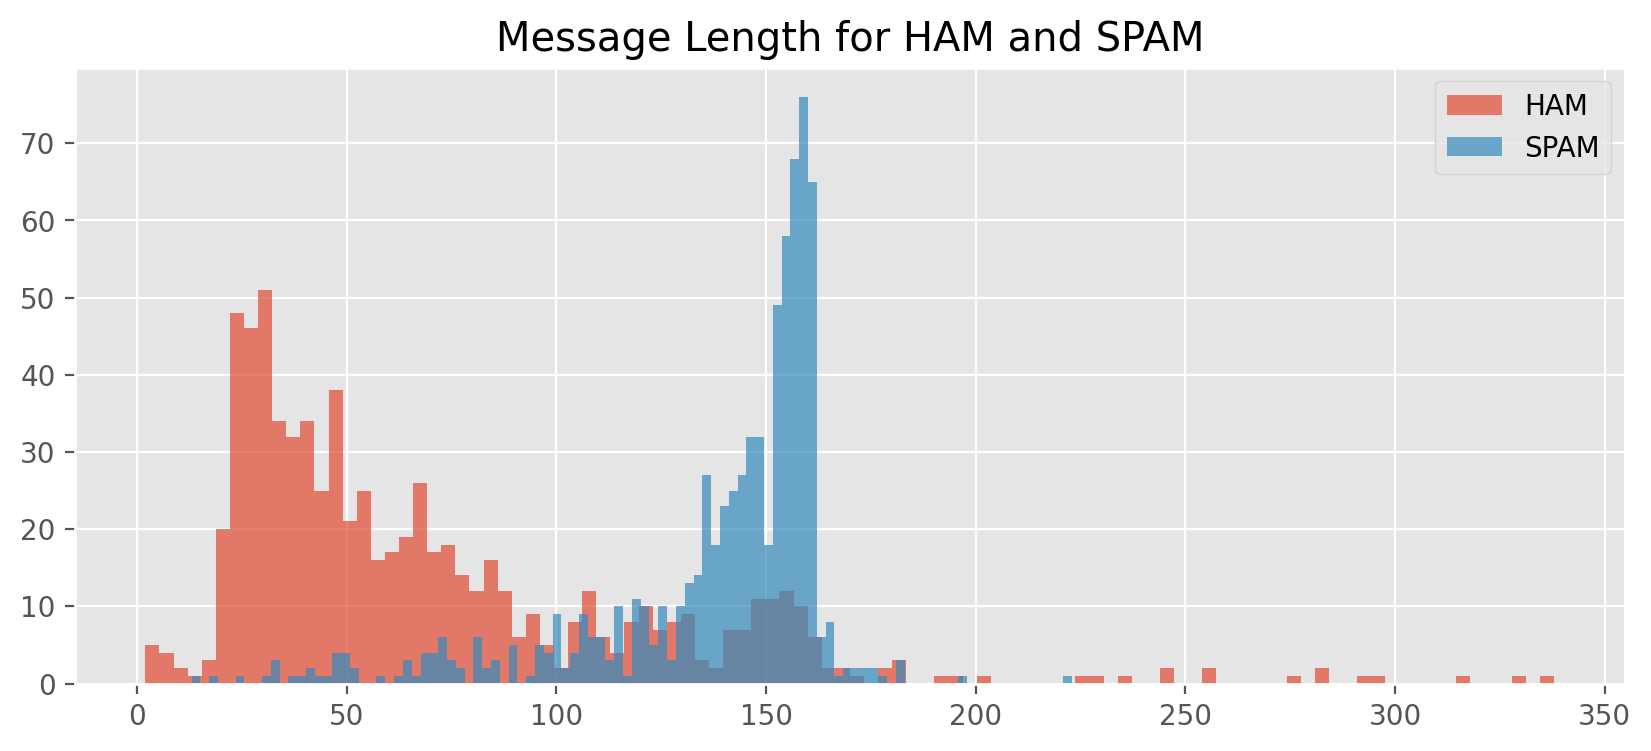

In [15]:
plt.hist(ham['length'], bins =100, alpha=0.7,label='HAM')
plt.hist(spam['length'], bins =100, alpha=0.7,label='SPAM')
plt.title('Message Length for HAM and SPAM')
plt.legend()
plt.show()

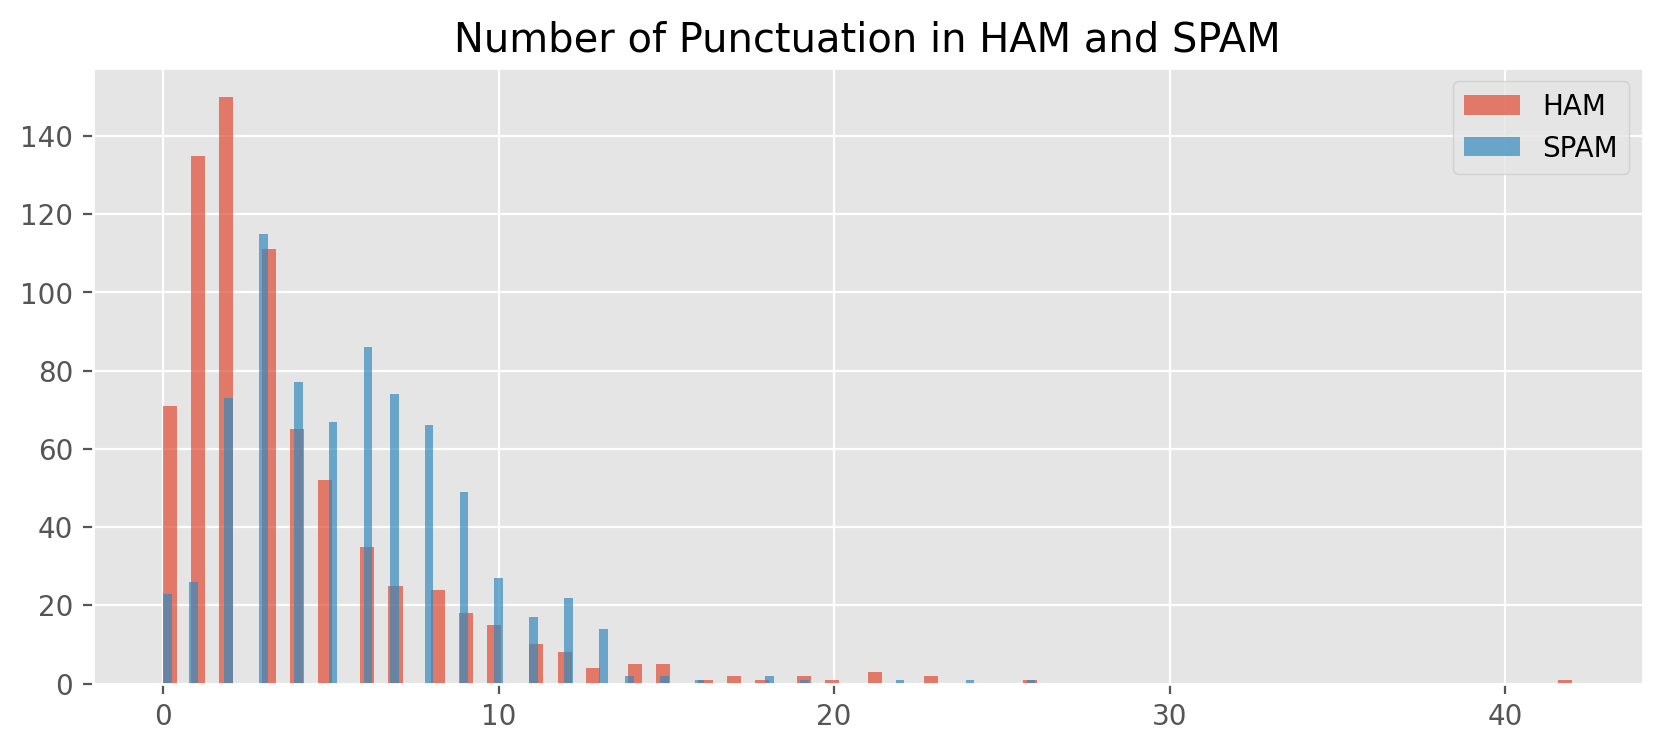

In [16]:
plt.hist(ham['punct'], bins =100, alpha=0.7,label='HAM')
plt.hist(spam['punct'], bins =100, alpha=0.7,label='SPAM')
plt.title('Number of Punctuation in HAM and SPAM')
plt.legend()
plt.show()


#### Data Preparation for Training

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [18]:
X_train, X_test, y_train,y_test = train_test_split(data['message']
                                                   ,data['label'],
                                                   test_size=0.2,
                                                   random_state=42,
                                                   shuffle=True,
                                                   stratify=data['label'])

X_train.shape,X_test.shape


((1195,), (299,))

In [19]:
# Vectorizing text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [20]:
# Create the model and fit the model

rf_classifier = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_classifier.fit(X_train_tfidf,y_train)

RandomForestClassifier(n_jobs=-1)

In [21]:
# make predictions
y_pred = rf_classifier.predict(X_test_tfidf)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       150
        spam       1.00      0.93      0.96       149

    accuracy                           0.96       299
   macro avg       0.97      0.96      0.96       299
weighted avg       0.97      0.96      0.96       299

